## Libraries

In [63]:
import numpy as numpy
import pandas as  pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier   
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier, plot_importance

## Functions

In [3]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [37]:
def build_train_model(model_name, X_train, y_train):
    if model_name == 'RandomForest':
        model = RandomForestClassifier(n_estimators=100, random_state=42)
    elif model_name == 'DecisionTree':
        model = DecisionTreeClassifier(random_state=42)
    elif model_name == 'XGBoost':
        model = XGBClassifier(eval_metric='mlogloss', random_state = 42)
    else:
        raise ValueError("Model not recognized")
    
    model.fit(X_train, y_train)
    return model

In [39]:
def test_evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    
    return accuracy, cm

In [45]:
def grid_evaluation(model_name, model, X_train, y_train, param_grid):
    grid = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid.fit(X_train, y_train)
    print(f"Best parameters for {model_name}: {grid.best_params_}")
    print(f"Best score for {model_name}: {grid.best_score_}")

## Loading data & preprocessing

In [5]:
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
           'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
           'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 
           'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
           'Soil_Type4', 'Soil_Type5', 'Soil_Type6','Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 
           'Soil_Type11','Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 
           'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 
           'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27','Soil_Type28', 'Soil_Type29', 'Soil_Type30',
           'Soil_Type31', 'Soil_Type32', 'Soil_Type33','Soil_Type34', 'Soil_Type35', 'Soil_Type36',
           'Soil_Type37', 'Soil_Type38', 'Soil_Type39','Soil_Type40', 'Cover_Type']

#We have to manually get the column names form the website ,cause they are not inside the data file

df = pd.read_csv(r"C:\Users\JNKV\OneDrive\Desktop\CS\A.I\Course\Data\covtype.data", header = None, names = columns)   

In [6]:
pd.set_option('display.max_columns', None)    # To see all the columns

In [7]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


In [8]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,0.448865,0.051434,0.436074,0.063627,0.005217,0.012952,0.008301,0.021335,0.002749,0.011316,0.000181,0.000308,0.001974,0.056168,0.021359,0.051584,0.030001,0.001031,0.000005,0.004897,0.005890,0.003268,0.006921,0.015936,0.001442,0.057439,0.099399,0.036622,0.000816,0.004456,0.001869,0.001628,0.198356,0.051927,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,0.497379,0.220882,0.495897,0.244087,0.072039,0.113066,0.090731,0.144499,0.052356,0.105775,0.013442,0.017550,0.044387,0.230245,0.144579,0.221186,0.170590,0.032092,0.002272,0.069804,0.076518,0.057077,0.082902,0.125228,0.037950,0.232681,0.299197,0.187833,0.028551,0.066605,0.043193,0.040318,0.398762,0.221879,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

Checking for outliers

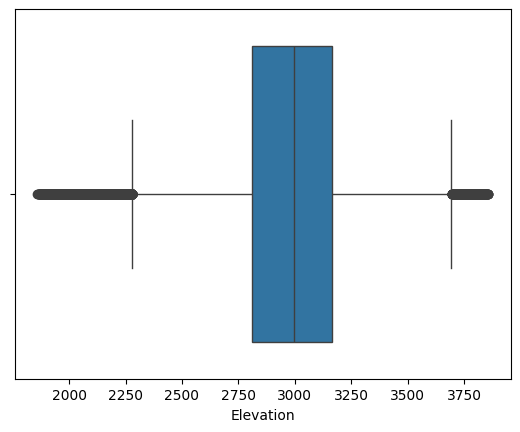

In [10]:
sns.boxplot(x = 'Elevation', data = df)
plt.show()

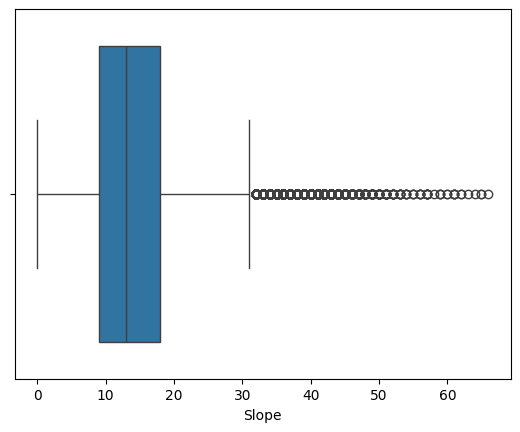

In [11]:
sns.boxplot(x = 'Slope', data = df)
plt.show()

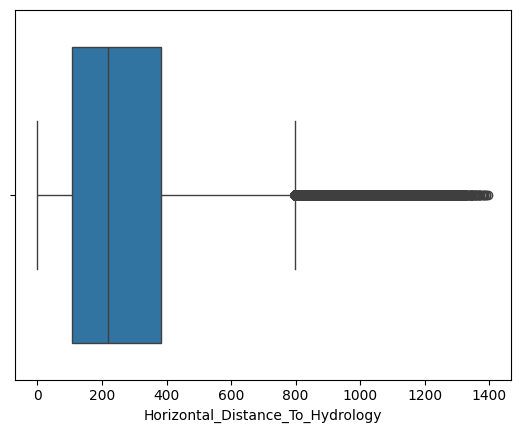

In [12]:
sns.boxplot(x = 'Horizontal_Distance_To_Hydrology', data = df)
plt.show()

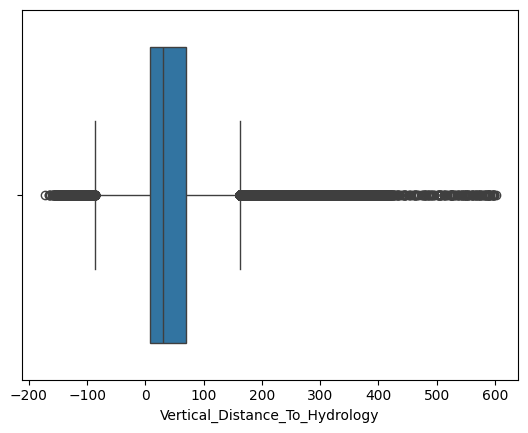

In [13]:
sns.boxplot(x = 'Vertical_Distance_To_Hydrology', data = df)
plt.show()

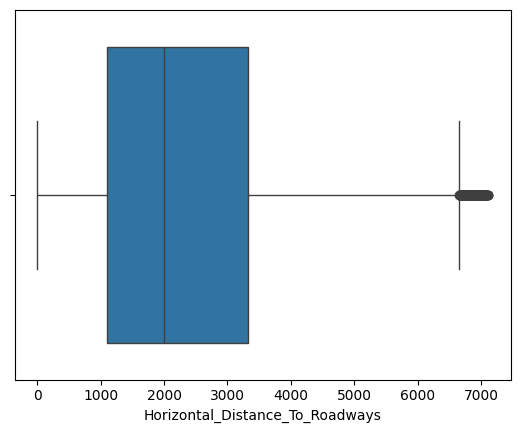

In [14]:
sns.boxplot(x = 'Horizontal_Distance_To_Roadways', data = df)
plt.show()

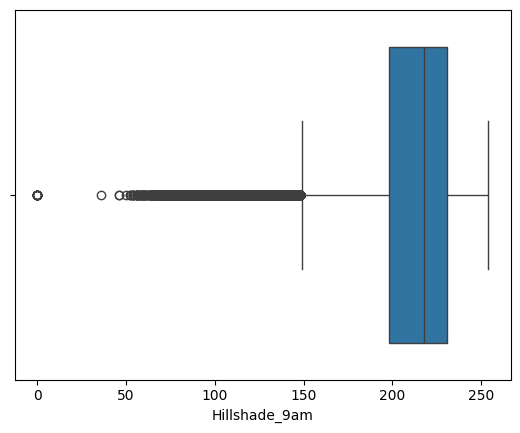

In [15]:
sns.boxplot(x = 'Hillshade_9am', data = df)
plt.show()

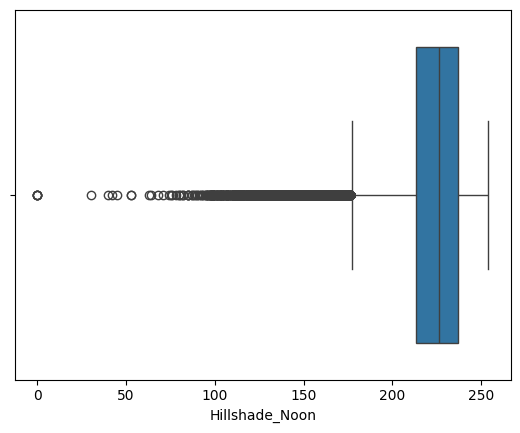

In [16]:
sns.boxplot(x = 'Hillshade_Noon', data = df)
plt.show()

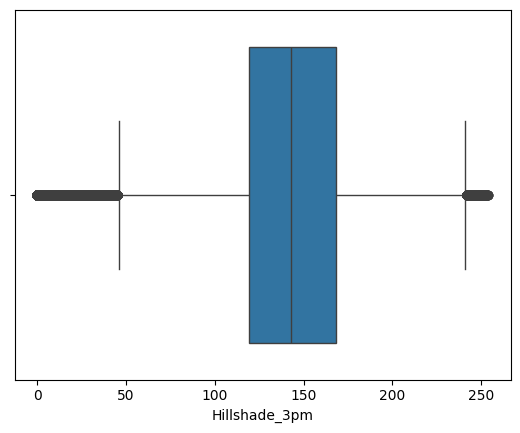

In [17]:
sns.boxplot(x = 'Hillshade_3pm', data = df)
plt.show()

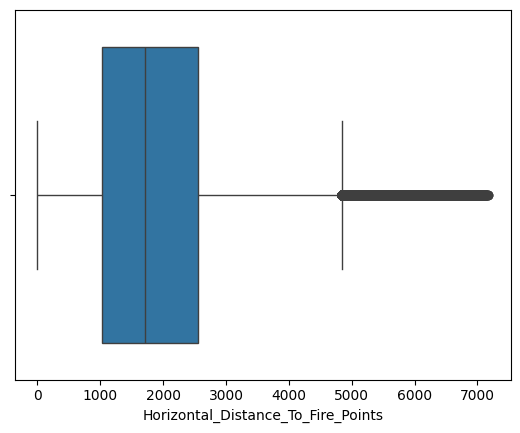

In [18]:
sns.boxplot(x = 'Horizontal_Distance_To_Fire_Points', data = df)
plt.show()

In [19]:
df = remove_outliers(df, 'Elevation')
df = remove_outliers(df, 'Slope')
df = remove_outliers(df, 'Horizontal_Distance_To_Hydrology')
df = remove_outliers(df, 'Vertical_Distance_To_Hydrology')
df = remove_outliers(df, 'Horizontal_Distance_To_Roadways')
df = remove_outliers(df, 'Hillshade_9am')
df = remove_outliers(df, 'Hillshade_Noon')
df = remove_outliers(df, 'Hillshade_3pm')
df = remove_outliers(df, 'Horizontal_Distance_To_Fire_Points')

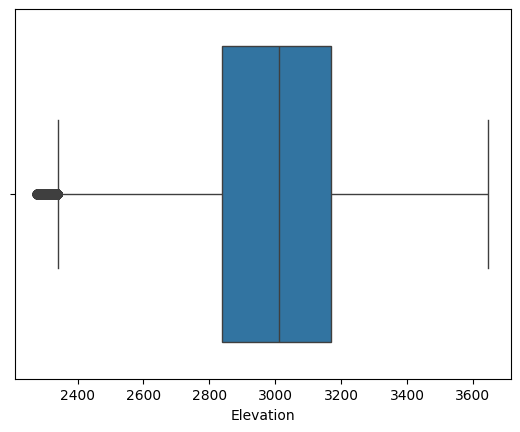

In [20]:
sns.boxplot(x = 'Elevation', data = df)
plt.show()

Not all outliers were removed from some of the columns, but since we are gonna work with models that can handle outliers and we removed the overly extreme ones, it's fine, we don't need to get rid of all of them

Also all the data is already numerical, so we don't need to change anything else.

## Training the models

splitting data

In [21]:
x = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)     # Changing the values of y from 1,2,3,4,5,6,7 to 0,1,2,3,4,5,6 ,so the model can understand it

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Building and visualizing important features

In [32]:
rf_model = build_train_model('RandomForest', x_train, y_train)

In [49]:
importances = rf_model.feature_importances_
features = x_train.columns

In [70]:
feat_imp_rf = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

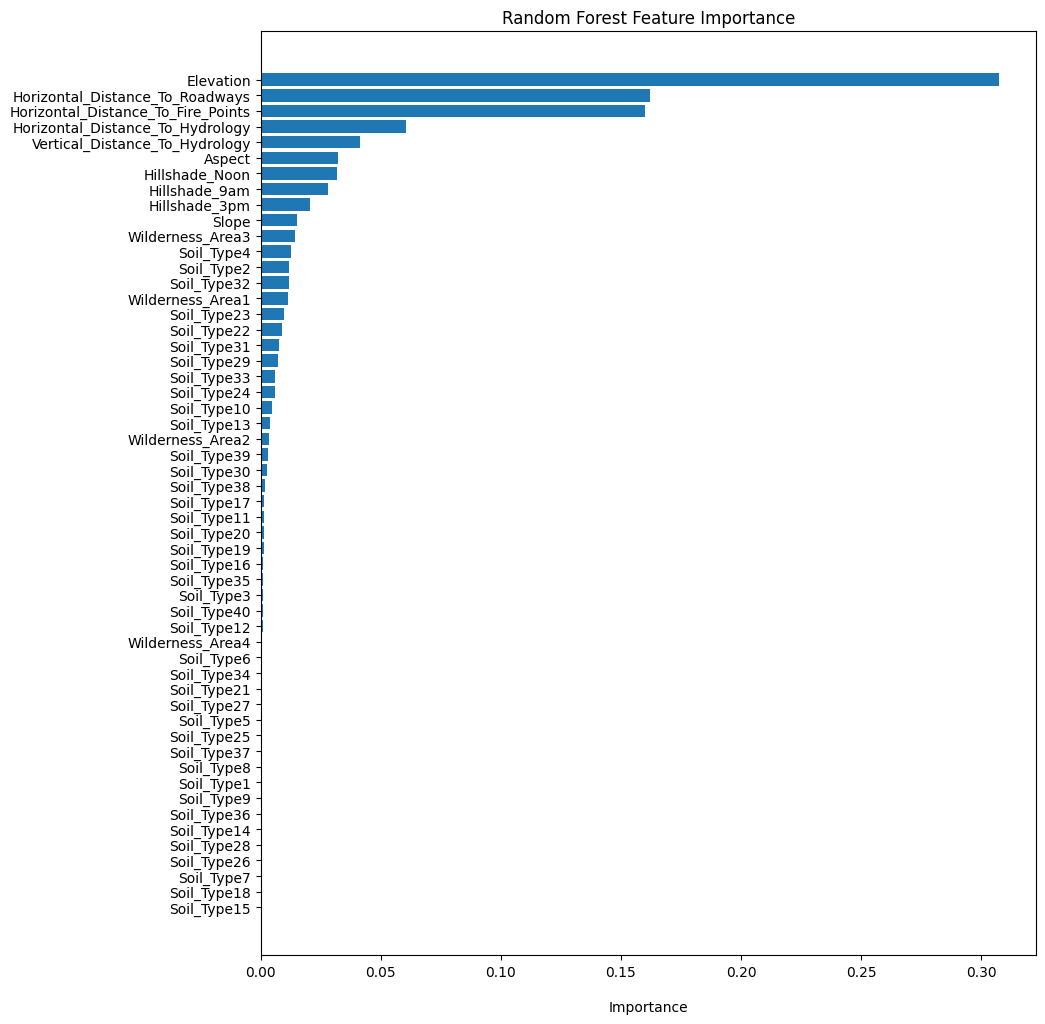

In [71]:
plt.figure(figsize=(10, 12))
plt.barh(feat_imp_df['Feature'], feat_imp_rf['Importance'])
plt.gca().invert_yaxis()
plt.title('Random Forest Feature Importance',)
plt.xlabel('Importance', labelpad=15)
plt.show()

In [33]:
dt_model = build_train_model('DecisionTree', x_train, y_train)

In [68]:
importances = dt_model.feature_importances_

feat_imp_dt = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

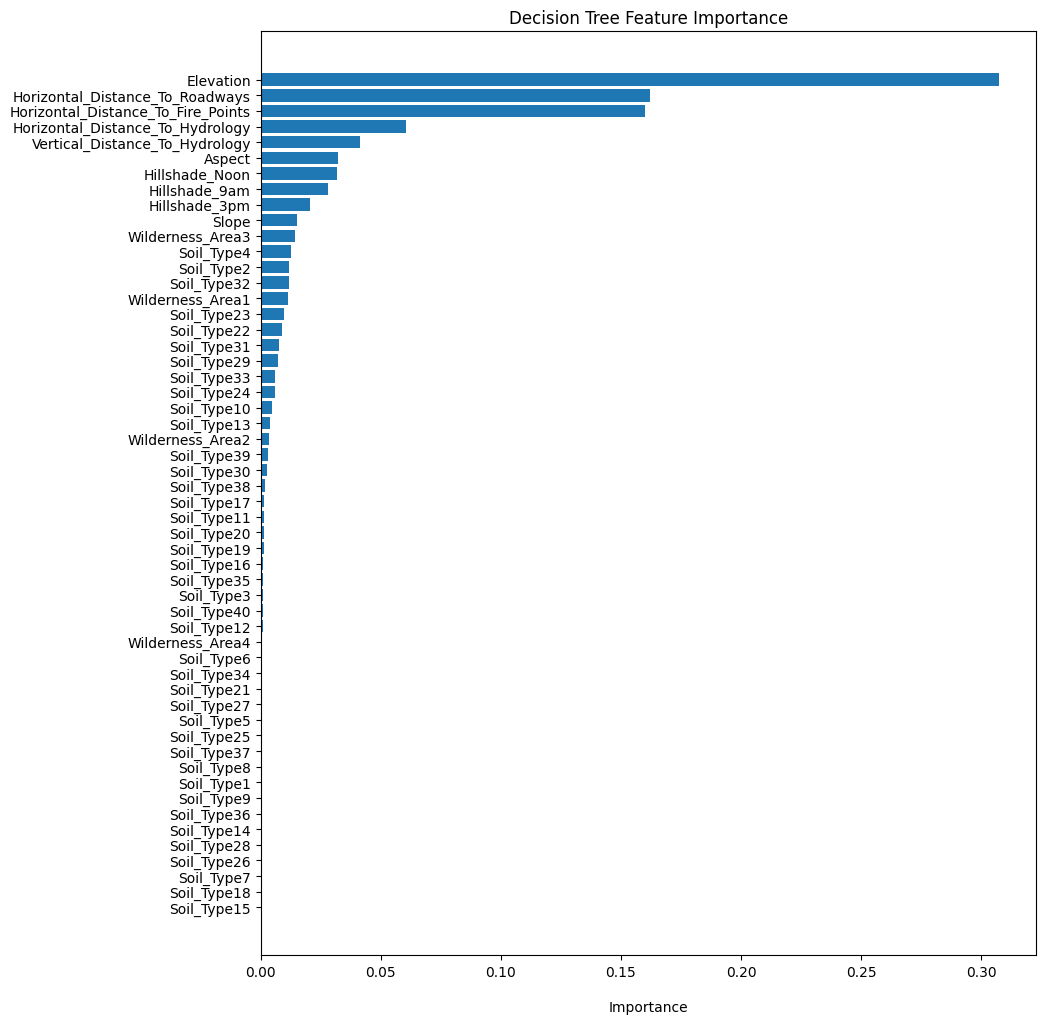

In [69]:
plt.figure(figsize=(10, 12))
plt.barh(feat_imp_df['Feature'], feat_imp_dt['Importance'])
plt.gca().invert_yaxis()
plt.title('Decision Tree Feature Importance',)
plt.xlabel('Importance', labelpad=15)
plt.show()

In [38]:
xgb_model = build_train_model('XGBoost', x_train, y_train)

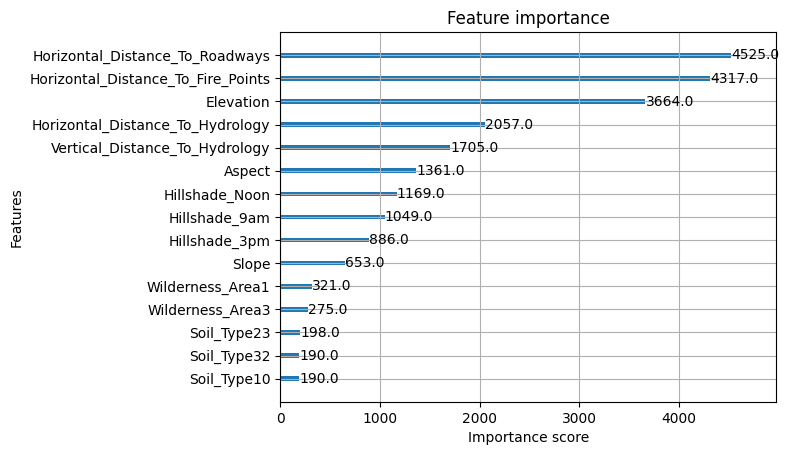

In [65]:
plot_importance(xgb_model, max_num_features=15)  
plt.show()

Evaluation and confusion matrix

Accuracy: 0.95


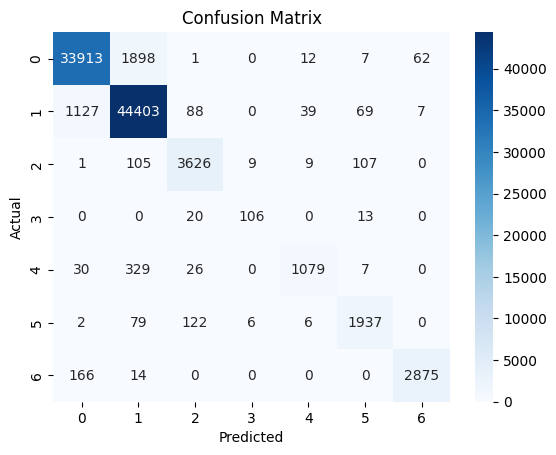

(0.9527518959913326,
 array([[33913,  1898,     1,     0,    12,     7,    62],
        [ 1127, 44403,    88,     0,    39,    69,     7],
        [    1,   105,  3626,     9,     9,   107,     0],
        [    0,     0,    20,   106,     0,    13,     0],
        [   30,   329,    26,     0,  1079,     7,     0],
        [    2,    79,   122,     6,     6,  1937,     0],
        [  166,    14,     0,     0,     0,     0,  2875]]))

In [40]:
test_evaluate_model(rf_model, x_test, y_test)

Accuracy: 0.94


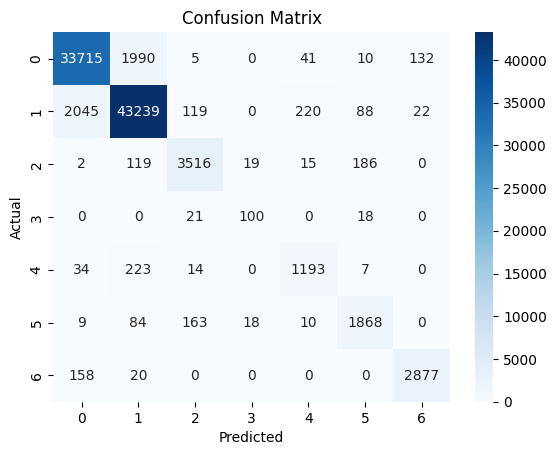

(0.9372481040086674,
 array([[33715,  1990,     5,     0,    41,    10,   132],
        [ 2045, 43239,   119,     0,   220,    88,    22],
        [    2,   119,  3516,    19,    15,   186,     0],
        [    0,     0,    21,   100,     0,    18,     0],
        [   34,   223,    14,     0,  1193,     7,     0],
        [    9,    84,   163,    18,    10,  1868,     0],
        [  158,    20,     0,     0,     0,     0,  2877]]))

In [41]:
test_evaluate_model(dt_model, x_test, y_test)

Accuracy: 0.87


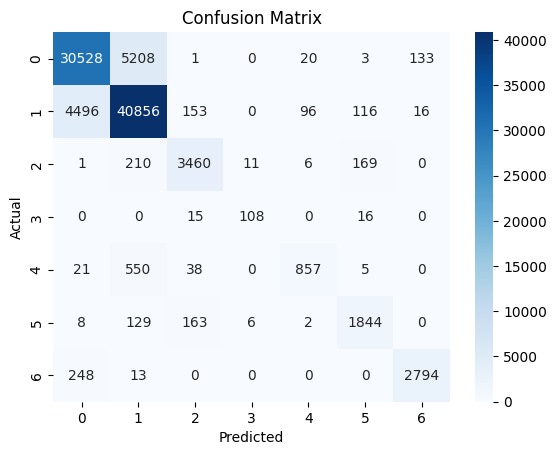

(0.8715817984832069,
 array([[30528,  5208,     1,     0,    20,     3,   133],
        [ 4496, 40856,   153,     0,    96,   116,    16],
        [    1,   210,  3460,    11,     6,   169,     0],
        [    0,     0,    15,   108,     0,    16,     0],
        [   21,   550,    38,     0,   857,     5,     0],
        [    8,   129,   163,     6,     2,  1844,     0],
        [  248,    13,     0,     0,     0,     0,  2794]]))

In [42]:
test_evaluate_model(xgb_model, x_test, y_test)

The random forest model has higher accuracy than the XGB model.

The XGB model confused classes 0 and 1 way more than the RF model.

Th DT model is almost the same as the RF model, it just has a fewer more mistakes.

## Hyperparameter tuning

In [44]:
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

dt_params = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

In [46]:
rf = RandomForestClassifier(random_state=42)
grid_evaluation('Random Forest', rf, x_train, y_train, rf_params)

Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best score for Random Forest: 0.9436782226855698


In [47]:
dt = DecisionTreeClassifier(random_state=42)
grid_evaluation('Decision Tree', dt, x_train, y_train, dt_params)

Best parameters for Decision Tree: {'max_depth': None, 'min_samples_split': 2}
Best score for Decision Tree: 0.9237648950268067


In [48]:
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
grid_evaluation('XGBoost', xgb, x_train, y_train, xgb_params)

Best parameters for XGBoost: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}
Best score for XGBoost: 0.9123049799251405
